In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import matplotlib.font_manager as fm
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df = pd.read_excel("./부동산가격-동별스코어.xlsx", sheet_name='동별스코어')

df.head()

,Unnamed: 0,gu_name,dong_name,미터당가격,TOTAL
0,1,강남구,개포동,2.754567e+07,67.55
1,2,서초구,반포동,2.599540e+07,73.61
2,3,서초구,잠원동,2.481231e+07,72.60
3,4,강남구,일원동,2.412757e+07,68.20
4,5,강남구,압구정동,2.407267e+07,69.98


In [3]:
df.tail()

,Unnamed: 0,gu_name,dong_name,미터당가격,TOTAL
223,226,은평구,구산동,5.739350e+06,65.22
224,227,도봉구,도봉동,5.680403e+06,60.89
225,228,도봉구,방학동,5.565385e+06,61.74
226,229,도봉구,쌍문동,5.550671e+06,66.55
227,230,구로구,가리봉동,5.434990e+06,60.97


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.columns

Index(['gu_name', 'dong_name', '미터당가격', 'TOTAL '], dtype='object')

In [6]:
df = df.rename(columns={'TOTAL ' : 'total'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gu_name    228 non-null    object 
 1   dong_name  228 non-null    object 
 2   미터당가격      228 non-null    float64
 3   total      228 non-null    float64
dtypes: float64(2), object(2)
memory usage: 7.2+ KB


In [8]:
df.describe()

,미터당가격,total
count,2.280000e+02,228.000000
mean,1.108192e+07,65.030175
std,4.027234e+06,3.922543
min,5.434990e+06,55.950000
25%,8.249396e+06,61.755000
50%,1.001385e+07,64.470000
75%,1.301126e+07,67.910000
max,2.754567e+07,78.830000


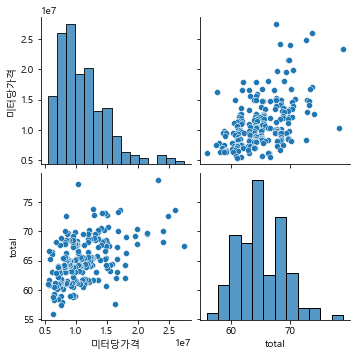

In [9]:
sns.pairplot(df[['미터당가격', 'total']])

plt.show()

In [11]:
cols = ['미터당가격', 'total']

corr = df[cols].corr(method='pearson')

In [12]:
corr

,미터당가격,total
미터당가격,1.000000,0.501332
total,0.501332,1.000000


<AxesSubplot:>

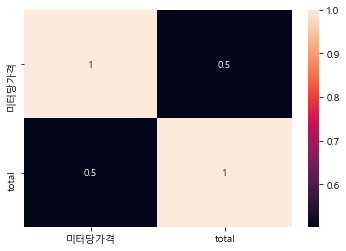

In [13]:
sns.heatmap(corr, annot=True)

In [14]:
# k-means
# X            	Y
#미터당 가격	   total
from sklearn.cluster import KMeans

X1 = df[['미터당가격' , 'total']].values

# inertia 라는 빈 리스트를 만들어줍니다. 
inertia = []

# 군집수 n을 1에서 11까지 돌아가며 X1에 대해 k-means++ 알고리즘을 적용하여 inertia를 리스트에 저장합니다. 
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [15]:
inertia

[3681626047944537.0,
 1350905748165812.5,
 627070120344235.2,
 353750272811695.0,
 232292249622397.25,
 154660429487620.06,
 113522931229540.72,
 83125036820390.3,
 66479190125796.78,
 54490743966046.305]

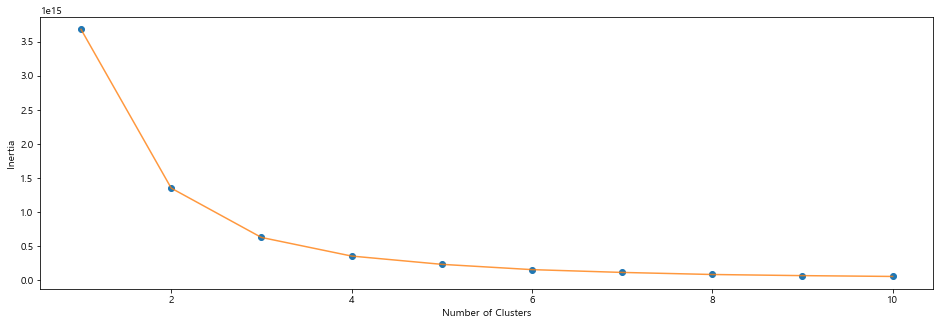

In [16]:
plt.figure(1, figsize=(16,5))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1, 11) ,inertia, '-', alpha = 0.8)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [17]:
df[['미터당가격' , 'total']].values

array([[2.75456699e+07, 6.75500000e+01],
       [2.59953999e+07, 7.36100000e+01],
       [2.48123136e+07, 7.26000000e+01],
       [2.41275701e+07, 6.82000000e+01],
       [2.40726728e+07, 6.99800000e+01],
       [2.32930364e+07, 7.88300000e+01],
       [2.15666287e+07, 6.95700000e+01],
       [2.15161624e+07, 6.97400000e+01],
       [1.98836882e+07, 7.04400000e+01],
       [1.98165312e+07, 6.77700000e+01],
       [1.95185307e+07, 6.92500000e+01],
       [1.81270894e+07, 6.89500000e+01],
       [1.81239946e+07, 6.62900000e+01],
       [1.79954891e+07, 6.42700000e+01],
       [1.79451557e+07, 6.19800000e+01],
       [1.71572021e+07, 7.36500000e+01],
       [1.67987338e+07, 7.33300000e+01],
       [1.67965804e+07, 7.01100000e+01],
       [1.67035873e+07, 6.52400000e+01],
       [1.66509573e+07, 6.72500000e+01],
       [1.66445998e+07, 6.30500000e+01],
       [1.65420500e+07, 6.19400000e+01],
       [1.63303508e+07, 5.76300000e+01],
       [1.58748603e+07, 6.43600000e+01],
       [1.556951

In [18]:
X1 = df[['미터당가격' , 'total']].values

algorithm = (KMeans(n_clusters = 5
        ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [19]:
h = 0.2
x_min, x_max = X1[:, 0].min(), X1[:,0].max()
y_min, y_max = X1[:, 1].min() -1, X1[:,1].max() +1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = '미터당가격' ,y = 'total' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('total') , plt.xlabel('미터당가격')
plt.show()

MemoryError: Unable to allocate 103. GiB for an array with shape (125, 110553398) and data type float64

In [31]:
kmeans = KMeans(n_clusters=5).fit(df[['미터당가격', 'total']].values)

In [32]:
print(kmeans.cluster_centers_)

[[1.25779083e+07 6.63338000e+01]
 [9.80291286e+06 6.46268657e+01]
 [2.41161817e+07 7.12600000e+01]
 [7.36385807e+06 6.29314286e+01]
 [1.62235176e+07 6.68154545e+01]]


In [33]:
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]


In [34]:
df['cluster'] = kmeans.labels_
print(df)

    gu_name dong_name         미터당가격  total  cluster
0       강남구       개포동  2.754567e+07  67.55        2
1       서초구       반포동  2.599540e+07  73.61        2
2       서초구       잠원동  2.481231e+07  72.60        2
3       강남구       일원동  2.412757e+07  68.20        2
4       강남구      압구정동  2.407267e+07  69.98        2
..      ...       ...           ...    ...      ...
223     은평구       구산동  5.739350e+06  65.22        3
224     도봉구       도봉동  5.680403e+06  60.89        3
225     도봉구       방학동  5.565385e+06  61.74        3
226     도봉구       쌍문동  5.550671e+06  66.55        3
227     구로구      가리봉동  5.434990e+06  60.97        3

[228 rows x 5 columns]


C:\BigData\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


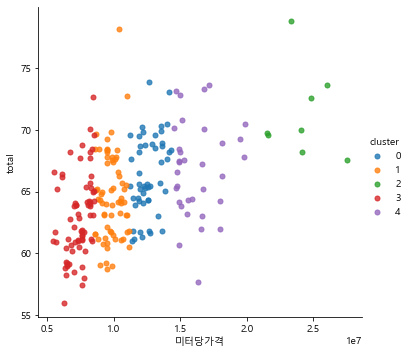

In [39]:
sns.lmplot('미터당가격', 'total', data=df, fit_reg=False, scatter_kws={'s':25}, hue='cluster') # 점의 크기 : 25
plt.xlabel('미터당가격')
plt.ylabel('total')
plt.show()

C:\BigData\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


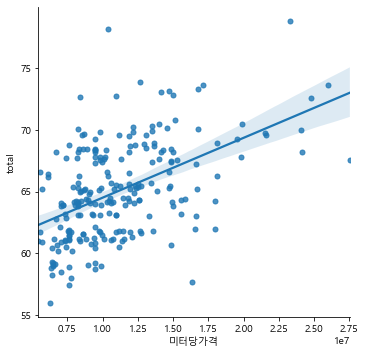

In [40]:
sns.lmplot('미터당가격', 'total', data=df, fit_reg=True, scatter_kws={'s':25}) # 점의 크기 : 25
plt.xlabel('미터당가격')
plt.ylabel('total')
plt.show()

In [42]:
print(df['미터당가격'].mean(), df['total'].mean())

11094149.904095786 65.03017543859646


In [84]:
df1 = df.loc[df['미터당가격'] <= 11094150]
df1

,gu_name,dong_name,미터당가격,total,cluster
93,강남구,신사동,1.097951e+07,72.76,1
94,은평구,신사동,1.097951e+07,63.10,1
95,관악구,신사동,1.097951e+07,61.73,1
96,동대문구,답십리동,1.093967e+07,65.55,1
97,종로구,이화동,1.093012e+07,63.08,1
...,...,...,...,...,...
223,은평구,구산동,5.739350e+06,65.22,3
224,도봉구,도봉동,5.680403e+06,60.89,3
225,도봉구,방학동,5.565385e+06,61.74,3
226,도봉구,쌍문동,5.550671e+06,66.55,3


In [85]:
df2 = df.loc[df['total'] >= 65]
df2

,gu_name,dong_name,미터당가격,total,cluster
0,강남구,개포동,2.754567e+07,67.55,2
1,서초구,반포동,2.599540e+07,73.61,2
2,서초구,잠원동,2.481231e+07,72.60,2
3,강남구,일원동,2.412757e+07,68.20,2
4,강남구,압구정동,2.407267e+07,69.98,2
...,...,...,...,...,...
209,용산구,청파동,6.708031e+06,68.23,3
221,은평구,갈현동,6.139252e+06,66.41,3
222,은평구,역촌동,6.138664e+06,66.18,3
223,은평구,구산동,5.739350e+06,65.22,3


In [94]:
df3 = pd.merge(df1, df2, how='inner', on=['gu_name', 'dong_name', '미터당가격','total', 'cluster'])

In [95]:
df3 = df3.sort_values('total', ascending=False)
df3

,gu_name,dong_name,미터당가격,total,cluster
5,성북구,길음동,1.036592e+07,78.14,1
0,강남구,신사동,1.097951e+07,72.76,1
30,성북구,돈암동,8.417323e+06,72.63,3
35,강북구,삼각산동,8.249396e+06,70.11,3
14,송파구,삼전동,9.805508e+06,69.80,1
25,성북구,삼선동,8.679603e+06,69.63,1
28,성북구,동선동,8.516363e+06,69.59,3
21,관악구,청림동,9.485273e+06,69.25,1
39,관악구,신림동,7.609678e+06,68.77,3
22,관악구,행운동,9.485273e+06,68.48,1


In [96]:
df3.reset_index(inplace=True)

In [98]:
df3 = df3.drop('index', axis=1)
df3

,gu_name,dong_name,미터당가격,total,cluster
0,성북구,길음동,1.036592e+07,78.14,1
1,강남구,신사동,1.097951e+07,72.76,1
2,성북구,돈암동,8.417323e+06,72.63,3
3,강북구,삼각산동,8.249396e+06,70.11,3
4,송파구,삼전동,9.805508e+06,69.80,1
5,성북구,삼선동,8.679603e+06,69.63,1
6,성북구,동선동,8.516363e+06,69.59,3
7,관악구,청림동,9.485273e+06,69.25,1
8,관악구,신림동,7.609678e+06,68.77,3
9,관악구,행운동,9.485273e+06,68.48,1


In [101]:
df3[['gu_name','dong_name', '미터당가격', 'total']].head(10)

,gu_name,dong_name,미터당가격,total
0,성북구,길음동,1.036592e+07,78.14
1,강남구,신사동,1.097951e+07,72.76
2,성북구,돈암동,8.417323e+06,72.63
3,강북구,삼각산동,8.249396e+06,70.11
4,송파구,삼전동,9.805508e+06,69.80
5,성북구,삼선동,8.679603e+06,69.63
6,성북구,동선동,8.516363e+06,69.59
7,관악구,청림동,9.485273e+06,69.25
8,관악구,신림동,7.609678e+06,68.77
9,관악구,행운동,9.485273e+06,68.48


In [10]:
# k-means 다른방법
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df_kmeans = df[['미터당가격', 'total']]

df_kmeans

sc_X = MinMaxScaler()
data2 = sc_X.fit_transform(df_kmeans)

In [11]:
data2

array([[1.        , 0.50699301],
       [0.92988592, 0.77185315],
       [0.87637846, 0.72770979],
       [0.84540955, 0.5354021 ],
       [0.84292671, 0.6131993 ],
       [0.80766609, 1.        ],
       [0.72958582, 0.59527972],
       [0.72730338, 0.60270979],
       [0.65347145, 0.6333042 ],
       [0.65043414, 0.51660839],
       [0.63695647, 0.58129371],
       [0.57402573, 0.56818182],
       [0.57388576, 0.45192308],
       [0.56807384, 0.36363636],
       [0.56579741, 0.26354895],
       [0.53016063, 0.7736014 ],
       [0.51394818, 0.75961538],
       [0.51385078, 0.61888112],
       [0.50964498, 0.40603147],
       [0.50726468, 0.49388112],
       [0.50697715, 0.31031469],
       [0.50233913, 0.2618007 ],
       [0.49276461, 0.07342657],
       [0.47216414, 0.36756993],
       [0.45835406, 0.36407343],
       [0.45686824, 0.31643357],
       [0.44513155, 0.50655594],
       [0.43795243, 0.64772727],
       [0.4340673 , 0.34353147],
       [0.43328748, 0.73776224],
       [0.

In [12]:
km = KMeans(n_clusters=5, algorithm='auto', init='k-means++', n_init=10, max_iter=300)

In [13]:
km.fit(data2)
predict = pd.DataFrame(km.predict(data2))

In [14]:
centers = pd.DataFrame(km.cluster_centers_, columns=['미터당가격', 'total'])
centers2 = sc_X.inverse_transform(centers)

In [15]:
centers2

array([[8.16377157e+06, 6.08252239e+01],
       [8.97422198e+06, 6.61278873e+01],
       [1.38260761e+07, 7.00368421e+01],
       [2.29225640e+07, 7.06854545e+01],
       [1.37804101e+07, 6.38431707e+01]])

In [16]:
df_kmeans

,미터당가격,total
0,2.754567e+07,67.55
1,2.599540e+07,73.61
2,2.481231e+07,72.60
3,2.412757e+07,68.20
4,2.407267e+07,69.98
...,...,...
223,5.739350e+06,65.22
224,5.680403e+06,60.89
225,5.565385e+06,61.74
226,5.550671e+06,66.55


In [17]:
predict

,0
0,3
1,3
2,3
3,3
4,3
...,...
223,1
224,0
225,0
226,1


In [18]:
df_kmeans = df_kmeans.reset_index()

In [19]:
predict = predict.reset_index()

In [20]:
data3 = pd.merge(predict, df_kmeans)

In [22]:
data3.columns=['index', 'cluster', '미터당가격', 'total']

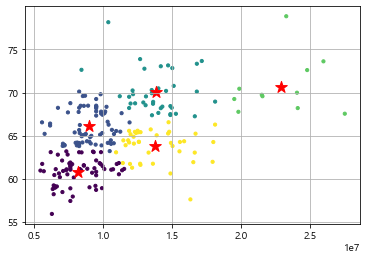

In [24]:
plt.grid()
plt.scatter(data3.미터당가격, data3.total, c=data3.cluster, s=10)
plt.scatter(centers2[:,0], centers2[:,1], s=150, marker='*', color='red')

In [28]:
df2 = data3[data3['cluster'] == 1]

In [29]:
pd.merge(df, df2, how='inner', on=['미터당가격', 'total'])

,gu_name,dong_name,미터당가격,total,index,cluster
0,마포구,성산동,1.191033e+07,66.54,77,1
1,서대문구,남가좌동,1.133240e+07,67.61,88,1
2,동대문구,전농동,1.123707e+07,65.47,89,1
3,동대문구,답십리동,1.093967e+07,65.55,96,1
4,성동구,마장동,1.077750e+07,65.20,98,1
...,...,...,...,...,...,...
66,용산구,청파동,6.708031e+06,68.23,209,1
67,은평구,갈현동,6.139252e+06,66.41,221,1
68,은평구,역촌동,6.138664e+06,66.18,222,1
69,은평구,구산동,5.739350e+06,65.22,223,1


In [33]:
print(df['미터당가격'].mean(), df['total'].mean())

11081922.66162968 65.03017543859646


In [35]:
df1 = df[df['미터당가격'] <= 11081922.66162968]

In [36]:
df1

,gu_name,dong_name,미터당가격,total
94,은평구,신사동,6.181084e+06,63.10
95,관악구,신사동,1.097951e+07,61.73
96,동대문구,답십리동,1.093967e+07,65.55
97,종로구,이화동,1.093012e+07,63.08
98,성동구,마장동,1.077750e+07,65.20
...,...,...,...,...
223,은평구,구산동,5.739350e+06,65.22
224,도봉구,도봉동,5.680403e+06,60.89
225,도봉구,방학동,5.565385e+06,61.74
226,도봉구,쌍문동,5.550671e+06,66.55


In [37]:
df2 = df[df['total'] >= 65.03017543859646]

In [38]:
df2

,gu_name,dong_name,미터당가격,total
0,강남구,개포동,2.754567e+07,67.55
1,서초구,반포동,2.599540e+07,73.61
2,서초구,잠원동,2.481231e+07,72.60
3,강남구,일원동,2.412757e+07,68.20
4,강남구,압구정동,2.407267e+07,69.98
...,...,...,...,...
209,용산구,청파동,6.708031e+06,68.23
221,은평구,갈현동,6.139252e+06,66.41
222,은평구,역촌동,6.138664e+06,66.18
223,은평구,구산동,5.739350e+06,65.22


In [40]:
pd_merge = pd.merge(df1, df2, how='inner', on=['gu_name','dong_name','미터당가격','total'])

In [42]:
pd_merge = pd_merge.sort_values('total', ascending=False)

In [43]:
pd_merge.reset_index(inplace=True)

In [47]:
pd_merge = pd_merge.drop('index', axis=1)

In [49]:
pd_merge

,gu_name,dong_name,미터당가격,total
0,성북구,길음동,1.036592e+07,78.14
1,성북구,돈암동,8.417323e+06,72.63
2,강북구,삼각산동,8.249396e+06,70.11
3,송파구,삼전동,9.805508e+06,69.80
4,성북구,삼선동,8.679603e+06,69.63
5,성북구,동선동,8.516363e+06,69.59
6,관악구,청림동,9.485273e+06,69.25
7,관악구,신림동,7.609678e+06,68.77
8,관악구,행운동,9.485273e+06,68.48
9,서대문구,홍제동,8.897131e+06,68.48
